<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_1_lab_4_Transformation_of_data_using_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformation of data using linear algebra**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
from IPython.display import Latex as lt
#Plotting functions
# function to plot a grid
def plotGrid(transform, unit, linestyle = ':', fig=None, ax=None):
  lim1 = -100
  lim2 = 100
  def mat2xy(start, end):
    if len(start.shape)==1:
      start = np.expand_dims(start,0)
      end = np.expand_dims(end,0)
    nan = np.ones(len(start))*np.nan
    x = np.stack((start[:,0], end[:,0], nan)).T.reshape(-1)
    y = np.stack((start[:,1], end[:,1], nan)).T.reshape(-1)
    return x, y

  def parallellines(axis, addend, lines, unit):
    addend = np.repeat(np.expand_dims(addend,0), lines*2, 0)
    unit = np.expand_dims(np.arange(-lines, lines)*unit,1)
    unit = unit-lines
    addend = addend*unit
    lines = np.expand_dims(axis,0) + addend
    return np.concatenate((lines, lines*-1))

  if fig is None:
    fig, ax = plt.subplots(figsize=(10,10))
  transform = transform.astype(np.float)
  xaxis = transform[0]
  yaxis = transform[1]

  # plot lines parallel to the x axis
  lines1= parallellines(xaxis*lim1, yaxis, 100,unit )
  lines2 = parallellines(xaxis*lim2, yaxis, 100,unit )
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot x axis
  x,y = mat2xy(xaxis*lim1, xaxis*lim2)
  plt.plot(x,y,linestyle, color = '#440077')

  # plot  lines parallel to the y axis
  lines1= parallellines(yaxis*lim1, xaxis, 100,unit)
  lines2 = parallellines(yaxis*lim2, xaxis, 100,unit)
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot y axis
  x,y = mat2xy(yaxis*lim1, yaxis*lim2)
  plt.plot(x,y,linestyle, color= '#aa5500')

  return fig, ax

def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):

  if fig is None:
    fig, ax = plt.subplots()
  for ii in range(nclasses):
    plt.scatter(X[y==ii,0], X[y==ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max()
  lim1 = X.min()
  add = abs(lim1-lim2)/5
  return fig, ax

Matrix transformations on data
A 2D coordinate system is defined by its basis vectors, i and j. In the standard coordinate system (T0), the basis vectors are

i={10}
and
j={01}

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

i={1−1}
and
j={02}

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

{a′b′}={−1102}{ab}
where the columns of the matrix are the basis vectors of T1.

In [3]:
T0 = np.array([[1,0],[0,1]])
T1 = np.array([[1,0], [-1,2]])

data1 = np.array([5,4]) # the data in T1 coordinate system
data0 = np.matmul(T1, data1) # the data in T0 coordinate system

print('Data in T0 = ', data0)
print('Data in T1 = ', data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines

<ipython-input-2-7705a4aea6e2>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transform = transform.astype(np.float)


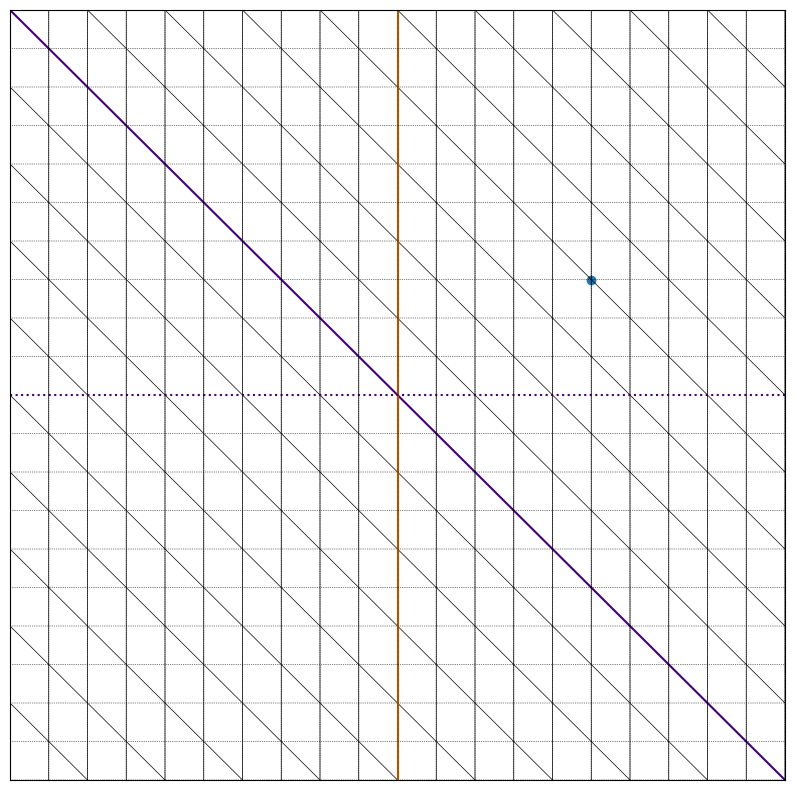

In [4]:
fig, ax = plotGrid(T1.T, 1,'-') # custom plotting function, no need to understand this
plotGrid(T0.T, 1, fig=fig, ax=ax) # custom plotting function, no need to understand this
plt.scatter(data0[0], data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([]);
ax.set_yticks([]);

The coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1.

In [5]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


In [6]:
# define 3 points in T1
A1 = np.array([3,3])
B1 = np.array([2,-5])
C1 = np.array([1,-1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# function to calculate Euclidean distance:
def dist(a, b):
  diff = a-b
  sq = diff*diff
  return np.sqrt(sq.sum())

# distance between the points in T1
print('Distance between A and B in T1 = ', dist(A1, B1))
print('Distance between B and C in T1 = ', dist(B1, C1))
print('Distance between A and C in T1 = ', dist(A1, C1))

print('')
# distnace between the points in T0
print('Distance between A and B in T0 = ', dist(A0, B0))
print('Distance between B and C in T0 = ', dist(B0, C0))
print('Distance between A and C in T0 = ', dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


# Transformations on MNIST

In [7]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary


In [8]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy() # We are only taking a subset of the training set
train_y = train_y[::100].copy() # do the same to the labels
test_X = test_X[::100].copy() # taking a subset of the test set. This code takes every 500th sample
test_y = test_y[::100].copy()

# get all the features
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1,2))/(28*28)
# test_sum = np.sum(test_X, (1,2))/(28*28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack((train_hole,train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

11490434/11490434 [==============================] - 0s 0us/step


(-100.0, 300.0)

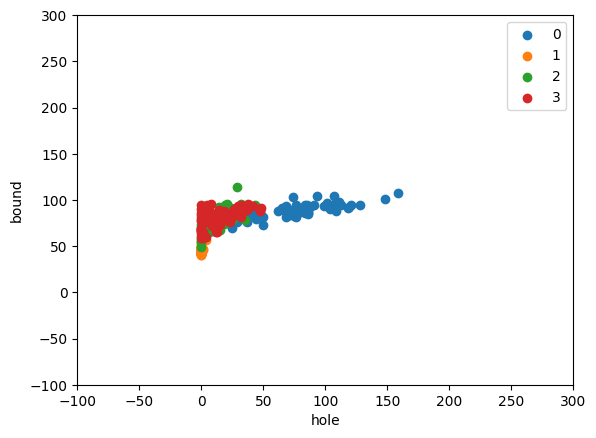

In [9]:
# fix limits of x and y axis so that we can see what is going on
xlim=[-100,300]
ylim=[-100,300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [10]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy = ', acc)

Baseline accuracy =  0.7619047619047619


 transforming the features and checking their accuracy

In [11]:
transform = np.array([[0.5,-0.5],[0,2.5]])

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

In [12]:
print(transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


(-100.0, 300.0)

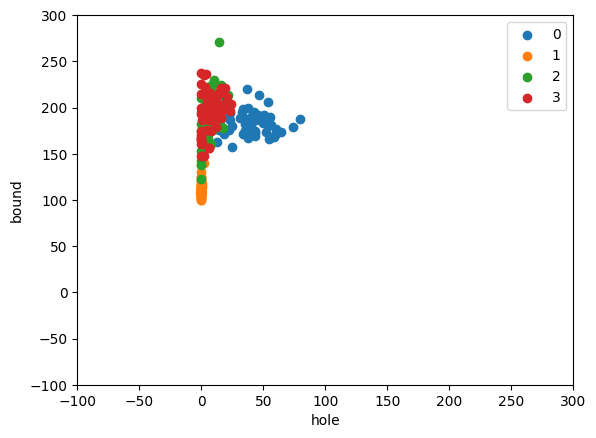

In [13]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [14]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


**Data normalization**

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization.

In [19]:
def rescale(data):
  return (data - data.min())/(data.max() - data.min())

In [20]:
train_feats_rescaled_x = rescale(train_feats[:,0])
train_feats_rescaled_y = rescale(train_feats[:,1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y),1)

test_feats_rescaled_x = rescale(test_feats[:,0])
test_feats_rescaled_y = rescale(test_feats[:,1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y),1)

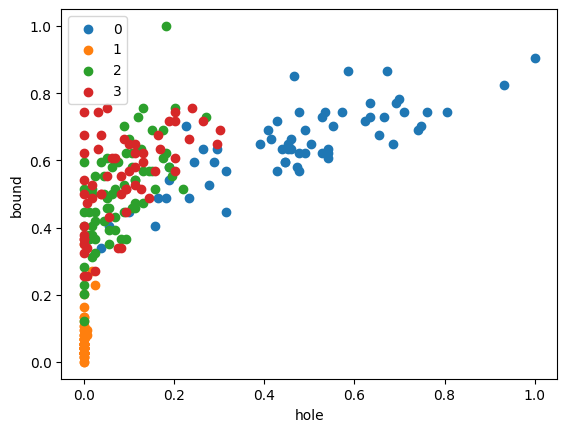

In [21]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.
The accuracy obtained by this transform

In [22]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


All 2D linear transformations can be repreented by a transformation matrix. We cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations

**Questions:**
1. Experiment with different transformation matrices and check the accuracy

In [40]:
T0 = np.array([[2,0],[0,2]])
T1 = np.array([[2,0], [-1,3]])

data1 = np.array([4,3]) # the data in T1 coordinate system
data0 = np.matmul(T1, data1) # the data in T0 coordinate system

print('Data in T0 = ', data0)
print('Data in T1 = ', data1)

Data in T0 =  [8 5]
Data in T1 =  [4 3]


<ipython-input-2-7705a4aea6e2>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transform = transform.astype(np.float)


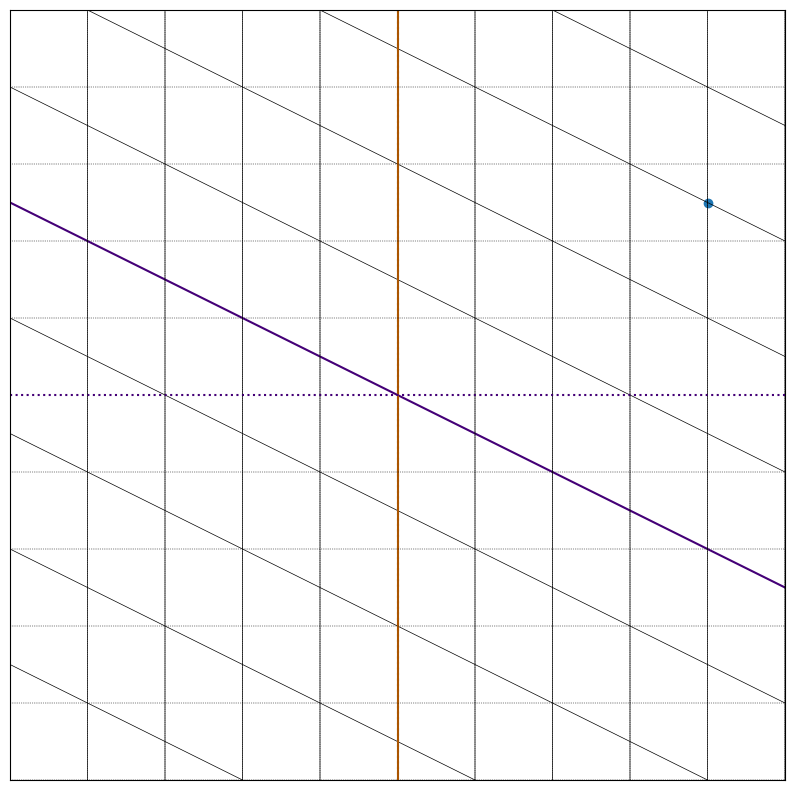

In [41]:
fig, ax = plotGrid(T1.T, 1,'-') # custom plotting function, no need to understand this
plotGrid(T0.T, 1, fig=fig, ax=ax) # custom plotting function, no need to understand this
plt.scatter(data0[0], data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([]);
ax.set_yticks([]);

In [42]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[8 5]
[8 5]


In [63]:
# let us define 3 points in T1
A1 = np.array([1,3])
B1 = np.array([2,-5])
C1 = np.array([1,-1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# function to calculate Euclidean distance:
def dist(a, b):
  diff = a-b
  sq = diff*diff
  return np.sqrt(sq.sum())

# distance between the points in T1
print('Distance between A and B in T1 = ', dist(A1, B1))
print('Distance between B and C in T1 = ', dist(B1, C1))
print('Distance between A and C in T1 = ', dist(A1, C1))

print('')
# distnace between the points in T0
print('Distance between A and B in T0 = ', dist(A0, B0))
print('Distance between B and C in T0 = ', dist(B0, C0))
print('Distance between A and C in T0 = ', dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.0

Distance between A and B in T0 =  25.079872407968907
Distance between B and C in T0 =  13.152946437965905
Distance between A and C in T0 =  12.0


In [64]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

In [67]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [68]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.0892


2. Will the same transform used for these two features also work for other features?

The effectiveness of a specific transform for different features depends on the nature of the data and the underlying relationships between the features.
1. Linear Transformations
2. Non-linear Transformations
3. Categorical Features
4. Time Series Data
5. Domain-Specific Knowledge
6. Feature Engineering
7. Normalization/Standardization